In [43]:
class Pool:
    def __init__(self, rD, rF):
        self.rD = rD
        self.rF = rF
        self.sD = rD
        self.sF = rF
        # self.lock = 
        # self.limitrF = rF
        
    def getPrice(self):
        return self.rD/self.rF
        
    def buyF(self, n):
        # assert n > 0
        # assert self.rF > n
        # if self.getPrice()> 1.02:
        #     return False
        if self.rF > n > 0:
            # exchange
            K = self.rD*self.rF
            self.rF -= n
            rD = K/self.rF
            incomeD = rD - self.rD
            # supply change
            self.sD += incomeD
            self.sF += (n*0.9985) # 0.15% fee
            # net asset change
            # [1]repair by reduce rD
            # net = self.sD/self.sF
            # self.rD = self.rF * net
            # [2]do not repair
            self.rD = rD
            return True
        else:
            return False
    
    def sellF(self, n):
        # assert n > 0
        # assert self.sF > n # 可能市面上都没有足够的F了 
        # 如果该池铸出的流动性全部收回了，此处应当如何处理？
        if self.sF > n >0:
            # exchange
            K = self.rD*self.rF
            rF = self.rF + n
            rD = K/rF
            outD = self.rD - rD
            # supply change
            self.sD -= (outD*0.9985) # 0.15% fee
            self.sF -= n
            # net asset change TODO--
            # net = self.sD/self.sF
            # [1] repair by raise rD first？
            # if rF * net < self.sD:
            #     self.rF = rF
            #     self.rD = rF * net
            # else:
            #     # repair by reduce rF
            #     self.rD = rD
            #     self.rF = rD / net
            # [2] only repair by reduce rF
            # self.rD = rD
            # self.rF = rD / net
            # [3] do not repair
            self.rD = rD
            self.rF = rF
            return True
        else:
            return False

In [35]:
AFpool = Pool(1000, 1000)
BFPool = Pool(1000, 1000)

# 加如市面上有无限供应的A=0.5B
# B为稳定币，也就是A大跌至0.5B
# 1. 卖出A买入F
# 2. 卖出F买入B
# 3. 2:1
while AFpool.getPrice()/BFPool.getPrice() < 2:
    AFpool.buyF(1)
    if not BFPool.sellF(1):
        break

In [10]:
AFpool.sF, AFpool.sD, AFpool.rF, AFpool.rD, AFpool.getPrice()

(1171.7419999999893,
 1207.729468599033,
 828,
 1207.729468599033,
 1.4586104693225037)

In [11]:
BFPool.sF, BFPool.sD, BFPool.rF, BFPool.rD, BFPool.getPrice()

(828, 853.4624573378842, 1172, 853.2423208191127, 0.7280224580367856)

In [13]:
(AFpool.sD*0.5+BFPool.sD)/(AFpool.sF+BFPool.sF)

0.7287576055498202

In [44]:
AFpool = Pool(1000, 1000)
BFPool = Pool(1000, 1000)
totalF = 2000

# 稳定币A和B，其中A崩盘至0，则A大量买入，B大量卖出至价格为0.5
while True:
    totalF += 0.9985
    if not AFpool.buyF(1):
        BFPool
        break

while True:  
    if BFPool.getPrice()>BFPool.sD/totalF and BFPool.sellF(1):
        totalF -= 1
        continue
    else:
        break

totalF, BFPool.sD

(1505.9834999999991, 664.9551495016616)

In [37]:
AFpool.sF, AFpool.sD, AFpool.rF, AFpool.rD, AFpool.getPrice()

(1122.815499999993,
 1140.250855188141,
 877,
 1140.250855188141,
 1.3001720127572873)

In [45]:
BFPool.sF, BFPool.sD, BFPool.rF, BFPool.rD, BFPool.getPrice()

(495, 664.9551495016616, 1505, 664.4518272425253, 0.4414962307259304)

In [ ]:
# 发生某一池买入时，允许其他池下修市价对齐净值。

In [76]:
class Pooltest:
    def __init__(self, rD, rF):
        self.rD = rD
        self.rF = rF
        self.sD = rD
        self.sF = rF
        # self.limitrF = rF
        
    def getPrice(self):
        return self.rD/self.rF
        
    def buyF(self, n):
        if self.rF > n > 0:
            # exchange
            K = self.rD*self.rF
            self.rF -= n
            rD = K/self.rF
            incomeD = rD - self.rD
            # supply change
            self.sD += incomeD
            self.sF += (n*0.9985) # 0.15% fee
            self.rD = rD
            return incomeD
        else:
            return 0
    
    def sellF(self, n):
        # if self.sF > n >0:
        if  n >0:
            # exchange
            K = self.rD*self.rF
            rF = self.rF + n
            rD = K/rF
            outD = self.rD - rD
            # supply change
            self.sD -= (outD*0.9985) # 0.15% fee
            self.sF -= n
            self.rD = rD
            self.rF = rF
            return outD
        else:
            return 0

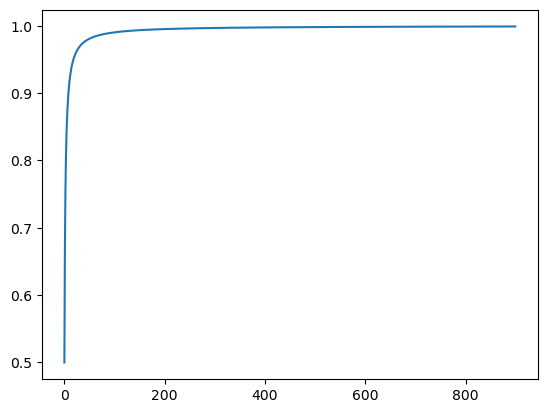

In [82]:
p = Pooltest(1000000, 1)
slip = []

for i in range(900):
    p_t = p.getPrice()
    p_r = p.sellF(1)
    if p_r == 0:
        break
    slip.append(p_r/p_t)

import matplotlib.pyplot as plt
plt.plot(slip)
plt.show()

In [80]:
p.rD, p.rF

(1000.0000000000002, 1000)